# Price Impact Analysis (Case: RTS)

In this analysis, we want to study the structure of Price Impact / Price formation in electricity markets.

## Dependencies and Data Preparation

#### Packages and Diretory

In [2]:
#make sure it is in "GridAnalysis.jl" cd("..\\..\\..\\")

In [2]:
pwd()

"C:\\Users\\Daniele\\Desktop\\Projeto\\GridAnalysis.jl"

In [3]:
using Pkg
Pkg.activate("./examples/RTS/price_impact_analysis_RTS")

In [4]:
Pkg.instantiate()

In [5]:
using Logging 
Logging.disable_logging(Logging.Info) #script to disable info messages 
Logging.disable_logging(Logging.Warn) #script to disable warning messages

LogLevel(1001)

In [6]:
using Dates
using DataFrames
using GridAnalysis
using Gurobi
using PowerSystems
using PowerSimulations
using Test
using Measures
using Plots

const PSY = PowerSystems

PowerSystems

#### Getting the data

In [7]:
# set directory
rts_dir = "./examples/RTS/RTS-GMLC"
# If RTS case is not downloaded you can run the following:
# rts_dir = download("https://github.com/GridMod/RTS-GMLC", "master", ".\\examples\\RTS")
# Or clone the directory and open as:
# for example: rts_dir = "/home/rafaela/Documents/PUC/LAMPS/github/RTS-GMLC"
rts_src_dir = joinpath(rts_dir, "RTS_Data", "SourceData")
rts_siip_dir = joinpath(rts_dir, "RTS_Data", "FormattedData", "SIIP");

#### Uploading Utils

Might not work if running lines manually 
(solution: edit to be the path for this examples directory for example: 'example_dir = "./examples/RTS/"')

In [8]:
example_dir = "./examples/RTS/"

include(joinpath(example_dir, "utils.jl")) # case utilities
include(joinpath(example_dir, "modify_RTS.jl")) # functions that modify the RTS problem

rts_modifier_function!

#### Data Prep and Build Market Simulator
define solvers for Unit Commitment (UC), Real Time (RT) and Economic Dispatch (ED)

In [9]:
solver_uc = optimizer_with_attributes(Gurobi.Optimizer)
solver_rt = optimizer_with_attributes(Gurobi.Optimizer)
solver_ed = optimizer_with_attributes(Gurobi.Optimizer)

MathOptInterface.OptimizerWithAttributes(Gurobi.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[])

## Define analysis to be done

In [10]:
Network = [DCPPowerModel];
Ramp = [true];
Minimal_generation = [true];
Reserve = [true];
Offer_Bus = ["Austen", "Bloch", "Chifa"];
bidding_period = [collect(1:24), [1]];


In [11]:
sys_DA, sys_rt = get_rts_sys(rts_src_dir, rts_siip_dir;)
#Grouping buses by zone

bus_names = [get_name(i) for i in get_components(Bus,sys_DA)]
A = [get_name(i) for i in get_components(Bus,sys_DA) if get_name(get_area(i)) == "1"]
B = [get_name(i) for i in get_components(Bus,sys_DA) if get_name(get_area(i)) == "2"]
C = [get_name(i) for i in get_components(Bus,sys_DA) if get_name(get_area(i)) == "3"]

plot_buses = [["Austen"], ["Bloch"], ["Chifa"], A, B, C];


#### Create a DataFrame where each line represents one analysis 

In [12]:
df = DataFrame(Network = [], 
               Ramp = [],
               Minimal_generation = [],
               Reserve = [],
               Offer_Bus = [],
               bidding_period = []) 

for a in Network 
    for b in Ramp 
        for c in Minimal_generation 
            for d in Reserve
                for e in Offer_Bus
                    for f in bidding_period
                        new_data = DataFrame(Network = [Dict("DA"=>a, "RT"=>a)], 
                        Ramp = [Dict("DA"=>b, "RT"=>b)],
                        Minimal_generation = [Dict("DA"=>c, "RT"=>c)],
                        Reserve = [d],
                        Offer_Bus = [e],
                        bidding_period = [f])
                        append!(df, new_data)
                    end
                end
            end
        end
    end
end
df[!,5:6]

6×2 DataFrame
 Row │ Offer_Bus  bidding_period                    
     │ Any        Any                               
─────┼──────────────────────────────────────────────
   1 │ Austen     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …
   2 │ Austen     [1]
   3 │ Bloch      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …
   4 │ Bloch      [1]
   5 │ Chifa      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …
   6 │ Chifa      [1]

#### Define range quota and period to be analysed

In [13]:
range_quota = Float64.(collect(0:1:4));
initial_time = Date("2020-09-01");
initial_bidding_time = DateTime("2020-09-01");
path = "results";

## Run all the simulations

In [41]:
run_set_of_simulations(df, rts_src_dir, rts_siip_dir, example_dir, solver_uc, solver_ed, solver_rt,
    range_quota, initial_time, initial_bidding_time, path)

### Locality Impact: What is the impact of the virtual offer as we move away from the offer node? 

Node relationship metrics to be used:

1. Price change at connected and non-connected nodes to the offer node;
2. Price change according to the distance to the offer node. Where "distance" refers to the number of buses between them;
3. Price change according to the bottleneck between the buses and the offer node. Where "bottleneck" is related to the trasmission lines capacity limits.

##### Load the simulation done previously 

In [53]:
lines=[1,3,5]
period_analysed=[[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24]]; 

In [38]:
graphic = "plot_price_curves"
plt_f = load_plot_set_of_simulations(df, example_dir, rts_src_dir, rts_siip_dir, solver_uc, solver_ed, solver_rt,
        range_quota, initial_time, lines, period_analysed, initial_bidding_time, path, graphic, false, plot_buses, "INC Offer");
plt_t = load_plot_set_of_simulations(df, example_dir, rts_src_dir, rts_siip_dir, solver_uc, solver_ed, solver_rt,
        range_quota, initial_time, lines, period_analysed, initial_bidding_time, path, graphic, true, plot_buses, "INC Offer");

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


##### plt indices [x,y,z]:

    x: line case in relation to 'df' DataFrame 
    y: period in relation to 'period_analysed' Vector
    z: buses choosed to be ploted in relation to 'plot_buses' Vector


#### Results

Bus offer: Austen

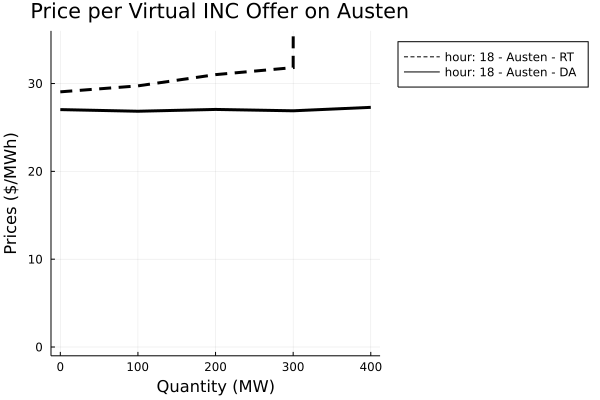

In [21]:
plot(plt_t[1,19,1],layout=(1,1))

Zone: A

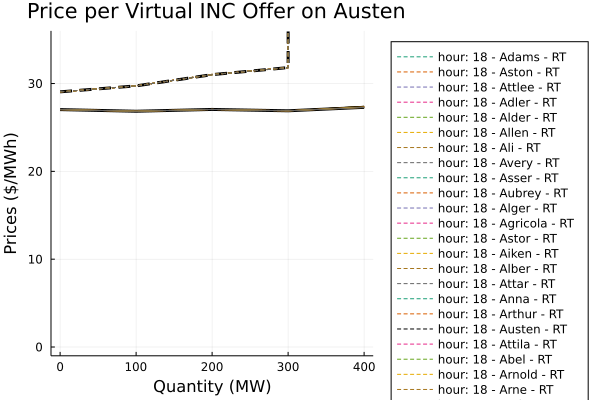

In [35]:
plot(plt_t[1,19,4],layout=(1,1))

Zone: B

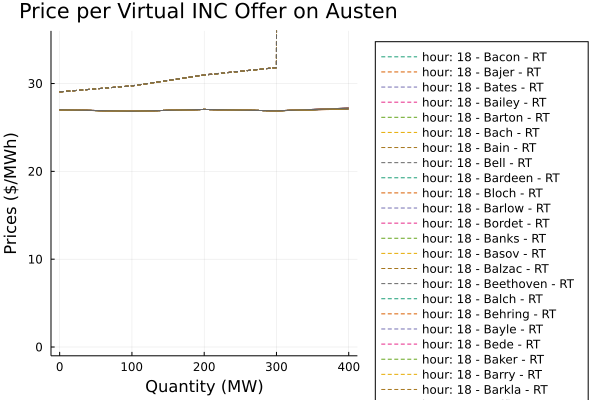

In [23]:
plot(plt_t[1,19,5],layout=(1,1))

Zone: C

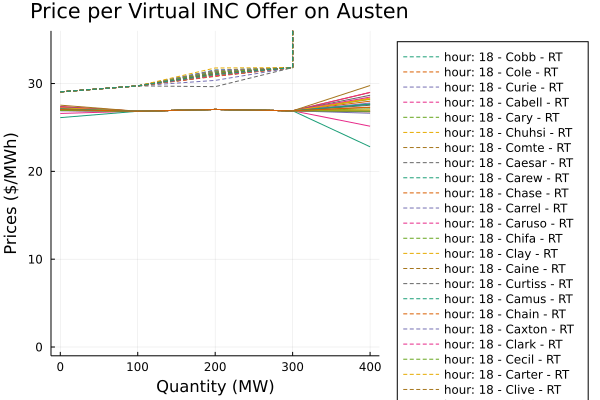

In [24]:
plot(plt_t[1,19,6],layout=(1,1))

Bus offer: Bloch

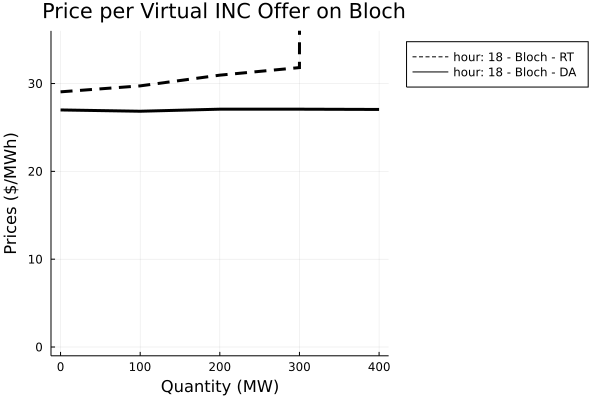

In [25]:
plot(plt_t[2,19,2],layout=(1,1))

Zone: A

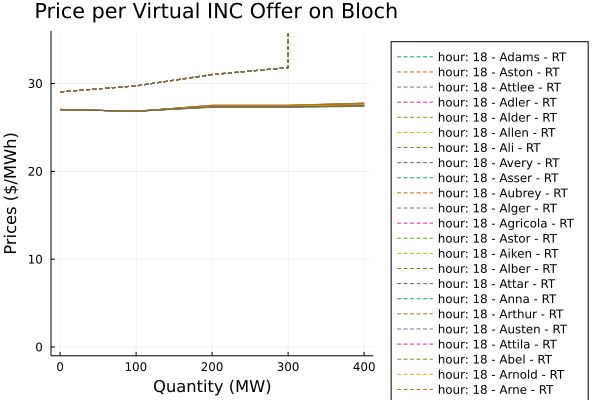

In [26]:
plot(plt_t[2,19,4],layout=(1,1))

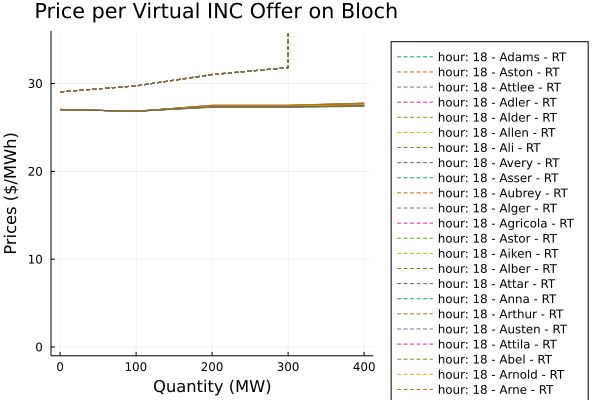

In [27]:
plot(plt_t[2,19,4],layout=(1,1))

Zone: B

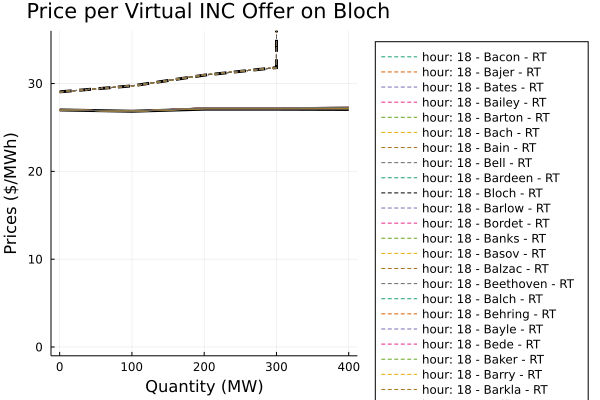

In [34]:
plot(plt_t[2,19,5],layout=(1,1))

Zone: C

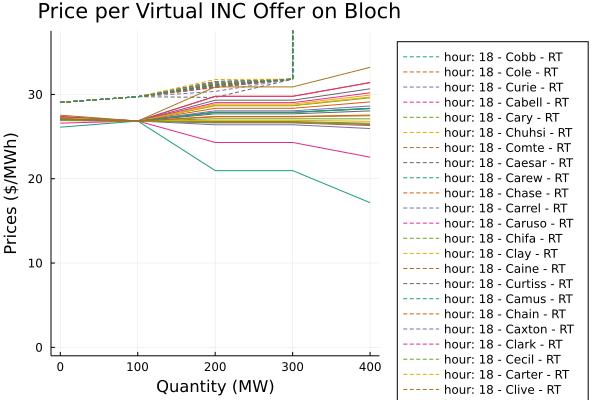

In [29]:
plot(plt_t[2,19,6],layout=(1,1))

Bus offer: Chifa

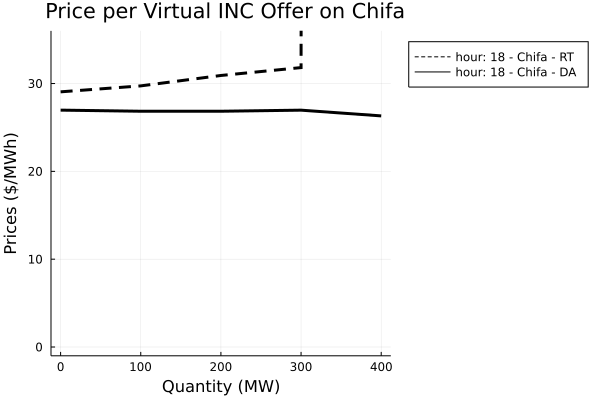

In [30]:
plot(plt_t[3,19,3],layout=(1,1))

Zone: A

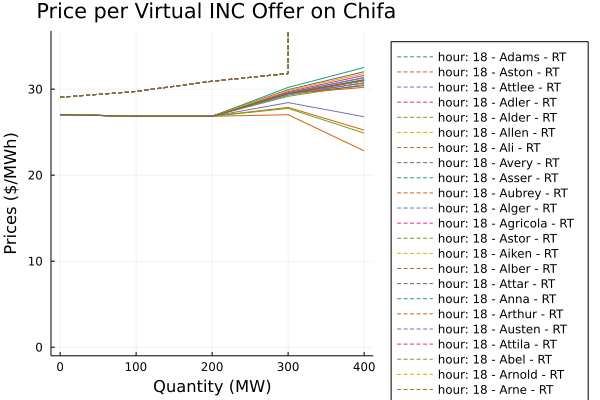

In [31]:
plot(plt_t[3,19,4],layout=(1,1))

Zone: B

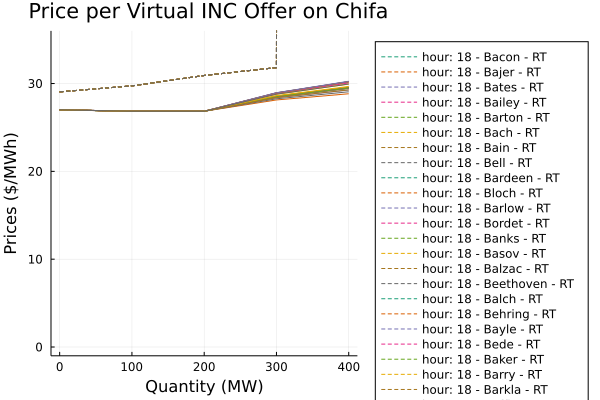

In [32]:
plot(plt_t[3,19,5],layout=(1,1))

Zone: C

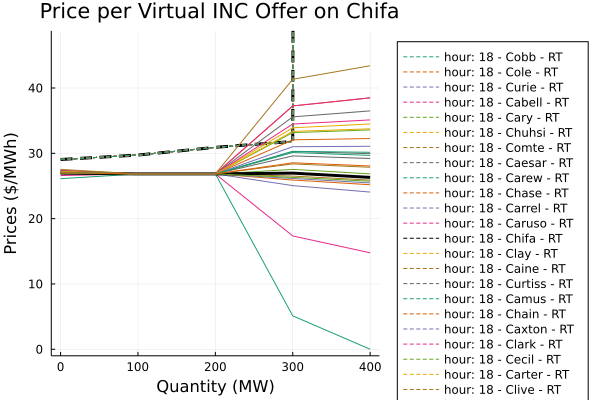

In [33]:
plot(plt_t[3,19,6],layout=(1,1))

### Hour Impact: What is the impact of the virtual offer as we move away from the offer period?
Proposed evaluation experiment: Make an offer in the first hour and see the impact in the other hours.

#### Load the simulation done previously

In [39]:
lines=[2,4,6]
period_analysed=[[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24]];

In [40]:
graphic = "plot_price_curves"
plt_hf = load_plot_set_of_simulations(df, example_dir, rts_src_dir, rts_siip_dir, solver_uc, solver_ed, solver_rt,
        range_quota, initial_time, lines, period_analysed, initial_bidding_time, path, graphic, false, plot_buses,"INC Offer");
plt_h = load_plot_set_of_simulations(df, example_dir, rts_src_dir, rts_siip_dir, solver_uc, solver_ed, solver_rt,
        range_quota, initial_time, lines, period_analysed, initial_bidding_time, path, graphic, true, plot_buses,"INC Offer");

        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).
        1 arquivo(s) copiado(s).


##### plt indices [x,y,z]:

    x: line case in relation to 'df' DataFrame 
    y: period in relation to 'period_analysed' Vector
    z: buses choosed to be ploted in relation to 'plot_buses' Vector

#### Results

### Price

Bus offer: Austen

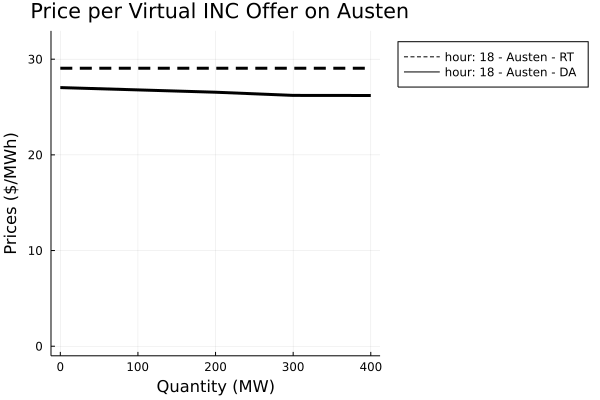

In [41]:
plot(plt[1,19,1],layout=(1,1))

Zone: A

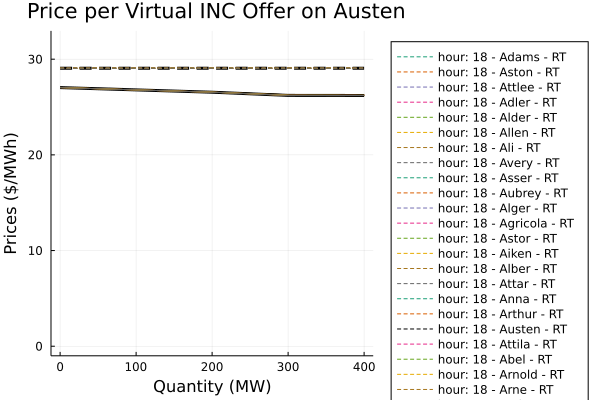

In [42]:
plot(plt_h[1,19,4],layout=(1,1))

Zone: B

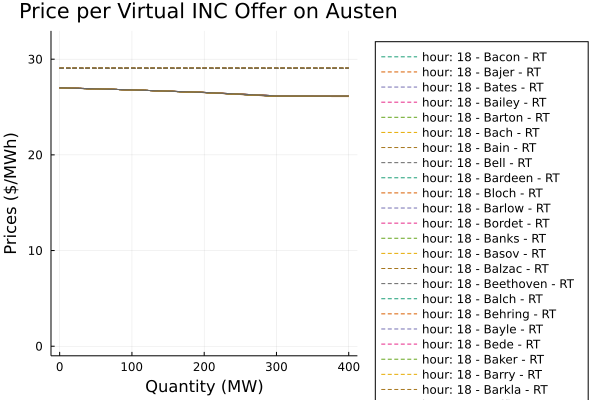

In [43]:
plot(plt_h[1,19,5],layout=(1,1))

Zone: C

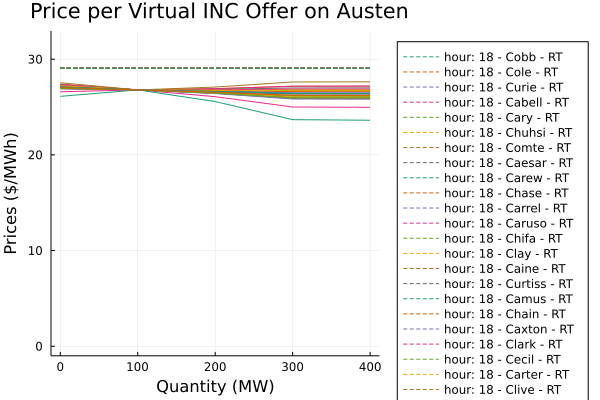

In [44]:
plot(plt_h[1,19,6],layout=(1,1))

Bus offer: Bloch

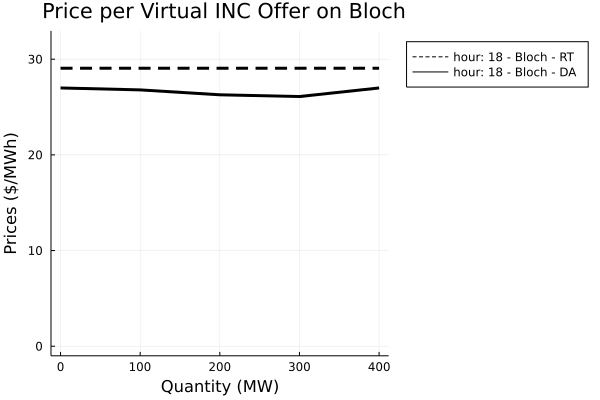

In [46]:
plot(plt_h[2,19,2],layout=(1,1))

Zone: A

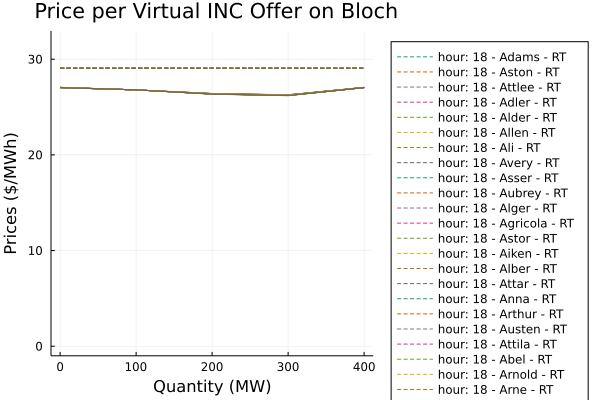

In [47]:
plot(plt_h[2,19,4],layout=(1,1))

Zone: B

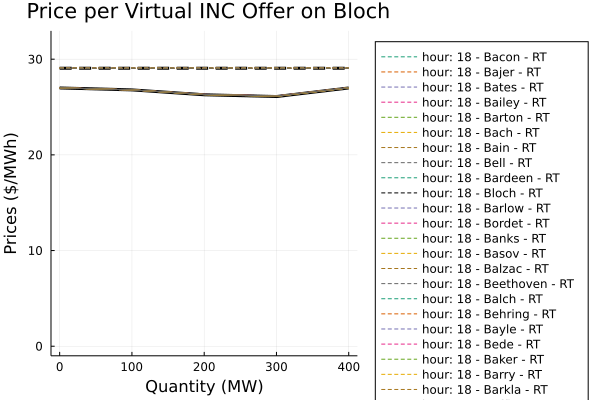

In [48]:
plot(plt_h[2,19,5],layout=(1,1))

Zone: C

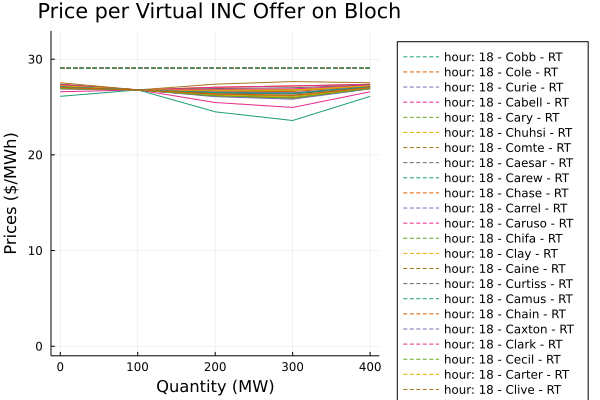

In [49]:
plot(plt_h[2,19,6],layout=(1,1))

Bus offer: Chifa

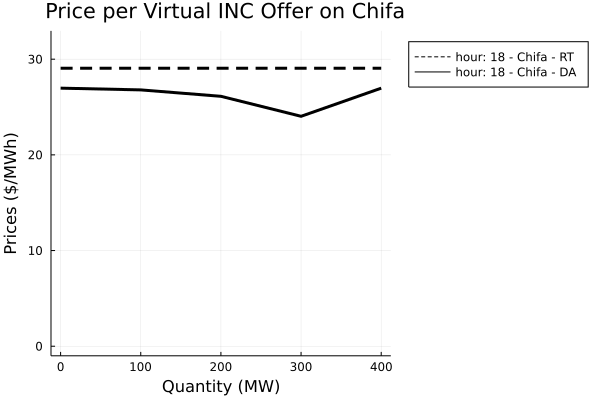

In [50]:
plot(plt_h[3,19,3],layout=(1,1))

Zone: A

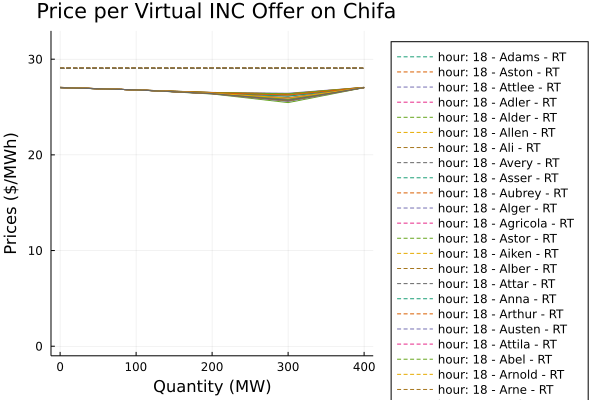

In [51]:
plot(plt_h[3,19,4],layout=(1,1))

Zone: B

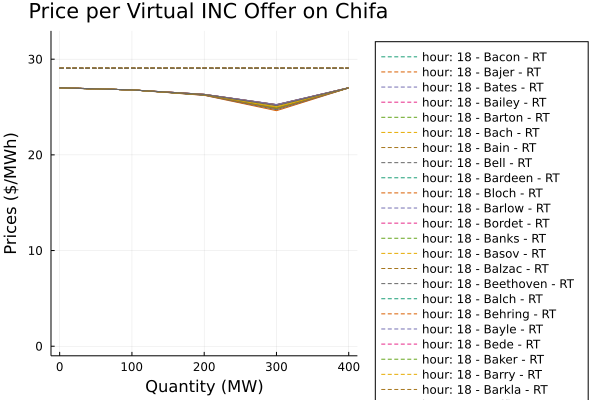

In [52]:
plot(plt_h[3,19,5],layout=(1,1))

Zone: C

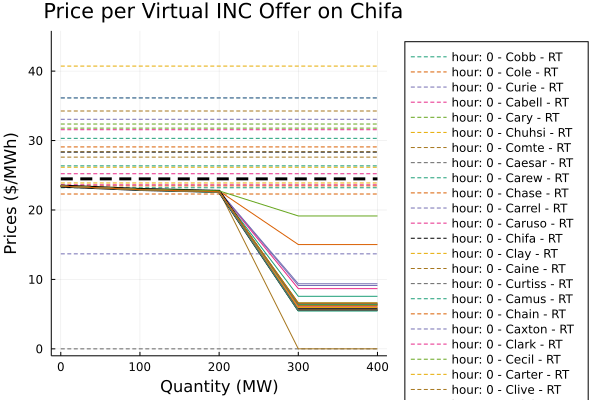

In [59]:
plot(plt_h[3,19,6],layout=(1,1))